# Novartis Data Science Challenge (Server Hack Prediction)

 __Objective__ : To predict if the server will be hacked

In [3]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [4]:
# Reading the dataset into a pandas dataframe

train = pd.read_csv("desktop/DATA/Novartis_Challenge/Dataset/Train.csv")
test = pd.read_csv("desktop/DATA/Novartis_Challenge/Dataset/Test.csv")
sample = pd.read_csv("desktop/DATA/Novartis_Challenge/Dataset/sample_submission.csv")

In [5]:
'''Knowing the Dataset'''

# Viewing Train Data
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [6]:
# Viewing Test Data
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [7]:
# Viewing Sample Submission
sample.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,0
2,.,.
3,.,.
4,CR_196089,1


In [8]:
# Getting the shape of the train and test dataset
train.shape,test.shape

((23856, 18), (15903, 17))

* In the train data, we find that there are 23856 instances or records and 18 columns, where INCIDENT_ID in the unique identifier for an incident, DATE represents the date when the incident occured, X_1 - X_15 are 15 different parameters based on which it is to be determined that whether a server will get hacked or not, and the MULTIPLE_OFFENSE column is the target column which provides the information that whether a particular incident was a hack or not represented by 1 or 0 respectively. 
* In the train data, there are observations related to 15903 incidents across 17 columns, we have to use these observations of X_1 - X_15 variables to predict that whether a certain incident is a hack or not.

Our objective is to build a prediction model using the training dataset to __predict the outcomes of multiple_offense column__ for the test data. 
As we see that the outcome can either be 1 i.e. the incident is a hack and 0 if the incident is not a hack, so, **this clearly is a classification problem**.

In [9]:
## Checking how many times an incident was a hack (1 = "HACK" , 0 = "NOT HACK")

count = train.MULTIPLE_OFFENSE.value_counts()

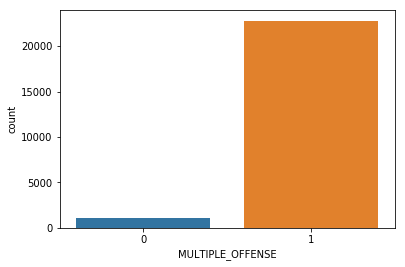

In [10]:
# Viewing the distribution of number of times an incident was a hack or not using count plot
sea.countplot(x="MULTIPLE_OFFENSE",data=train)

In [11]:
'''Preparing the training dataset'''

server_x = train.drop(["INCIDENT_ID","DATE","MULTIPLE_OFFENSE"],axis=1)
server_y = train["MULTIPLE_OFFENSE"]
server_test = test.drop(["INCIDENT_ID","DATE"],axis=1)
result = test.iloc[:,0:1]

To get the required data to train our model, we drop the columns 'INCIDENT_ID' and 'DATE', as these does not impact the target that whether a specific incident is a hack or not. Instead, we need the observations of X_1 - X_15 to build our model and achieve our objective.
* We prepare server_x with the required columns of X_1 to X_15 from the train set.
* server_y is prepared with the data of MULTIPLE_OFFENSE column from the train set.

We also do the same for the test data and remove the columns 'INCIDENT_ID' and 'DATE' from it and prepare server_test with the columns X_1 to X_15 of the test set. We need to predict the y values i.e. MULTIPLE_OFFENSE values for the incidents in server_test.

In [12]:
server_x.head(n=2) #Checking server_x

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34


In [13]:
server_y.head(n=3) #Checking server_y

0    0
1    1
2    1
Name: MULTIPLE_OFFENSE, dtype: int64

In [14]:
server_test.head(n=2) #Checking server_test

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34


In [15]:
result.head(n=2) #Checking result

,INCIDENT_ID
0,CR_195453
1,CR_103520


Now we have all our required dataframes. Before, getting into building our model we first need to look at few more information regarding server_x.

In [16]:
# Getting information about different columns of server_x
server_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 15 columns):
X_1     23856 non-null int64
X_2     23856 non-null int64
X_3     23856 non-null int64
X_4     23856 non-null int64
X_5     23856 non-null int64
X_6     23856 non-null int64
X_7     23856 non-null int64
X_8     23856 non-null int64
X_9     23856 non-null int64
X_10    23856 non-null int64
X_11    23856 non-null int64
X_12    23674 non-null float64
X_13    23856 non-null int64
X_14    23856 non-null int64
X_15    23856 non-null int64
dtypes: float64(1), int64(14)
memory usage: 2.7 MB


In [17]:
'''Checking and dealing with missing data in our dataset'''
# Checking for missing observations in server_x
server_x.isnull().sum()

X_1       0
X_2       0
X_3       0
X_4       0
X_5       0
X_6       0
X_7       0
X_8       0
X_9       0
X_10      0
X_11      0
X_12    182
X_13      0
X_14      0
X_15      0
dtype: int64

In [18]:
# Checking for missing observation in server_test
server_test.isnull().sum()

X_1       0
X_2       0
X_3       0
X_4       0
X_5       0
X_6       0
X_7       0
X_8       0
X_9       0
X_10      0
X_11      0
X_12    127
X_13      0
X_14      0
X_15      0
dtype: int64

On Checking for missing data in server_x and server_test, we find that-
* There are a total of 182 values missing in X_12 column of server_x
* There are a total of 127 values missing in X_12 column of server_test

We now need to deal with these missing data, which can be done in two ways-
* One way is to just remove these records from out server_x and use the remaining data to build our model.
* The other way is to impute or substitute these missing values using an estimated value and then use all the data to train our model.

__We will follow the 2nd way and impute these missing values for the X_12 column using the median of the values of X_12.__ Let us first have a look at the distribution of X_12 values.

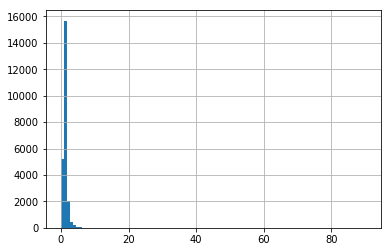

In [19]:
# Viewing the distrbution of X_12 in server_x

server_x['X_12'].dropna().hist(bins=100)

In [20]:
# Summary of all the columns of server_x
server_x.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000


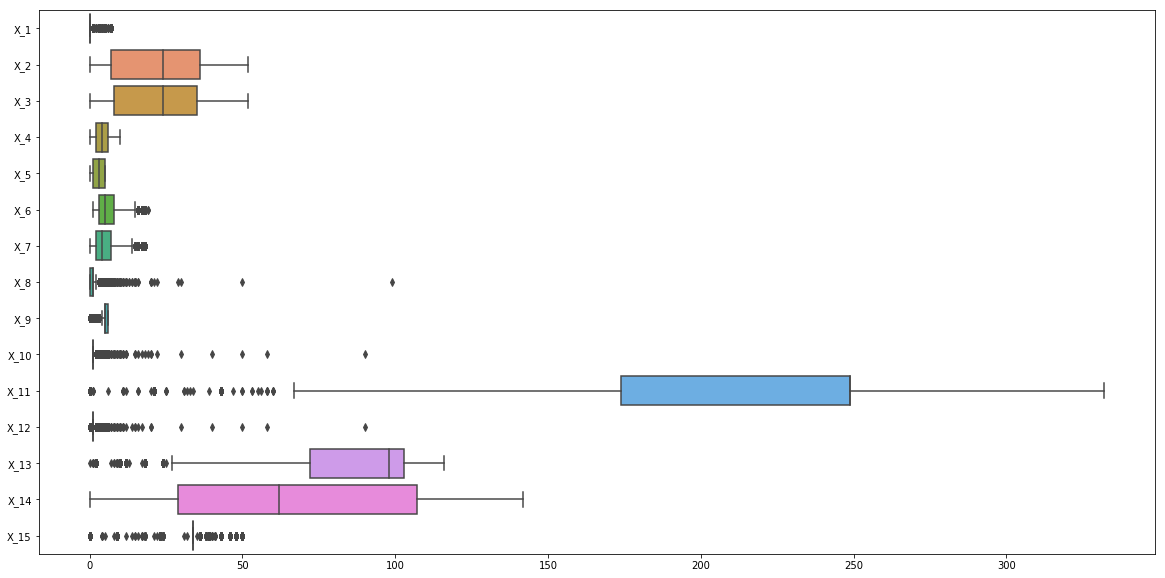

In [21]:
# Visualising the variables in server_x using box plot
plt.subplots(figsize=(20, 10))
sea.boxplot(data = server_x, orient = "h",)

In [22]:
#Imputing the missing values in X_12 with median value

server_x.fillna(server_x.median(), inplace = True)
server_test.fillna(server_test.median(), inplace = True)
server_x['X_12'].isnull().sum(),server_test['X_12'].isnull().sum()

(0, 0)

All the missing values in X_12 have been replaced with the median of all the values of X_12.

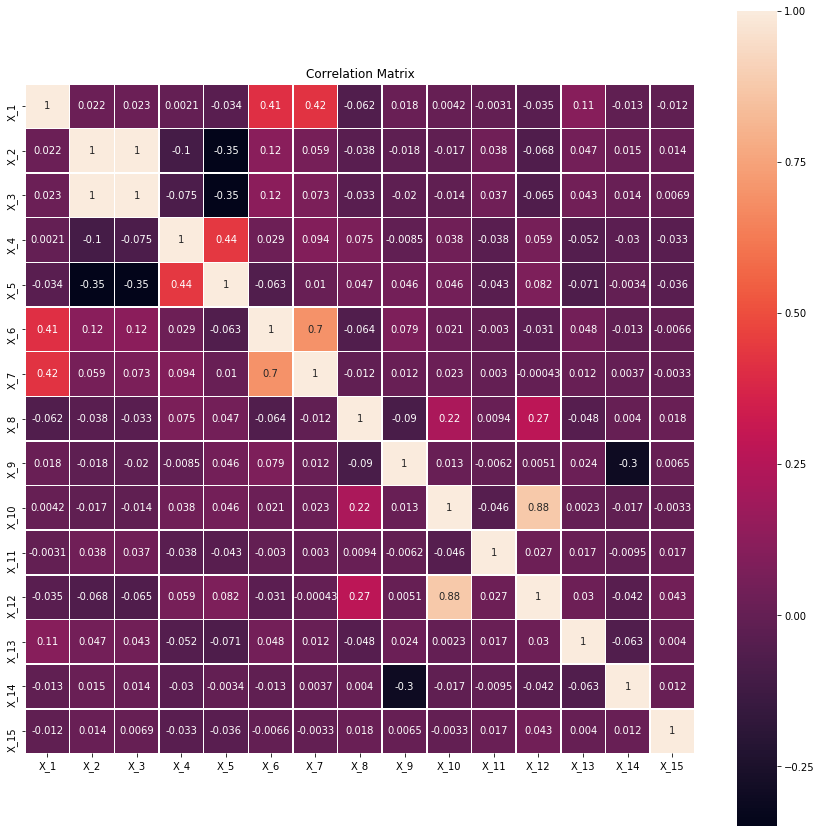

In [23]:
# Viewing the correlation matrix for variables of server_x
plt.subplots(figsize=(15,15))
plt.title("Correlation Matrix")
sea.heatmap(server_x.corr(),linewidths=0.5,vmax=1.0,square=True,annot=True)
plt.show()

From the above correlation matrix we find that-
* X_2 and X_3 are __totally positively correlated__ as their Pearsons correlation coefficient is equal to 1
* X_6 and X_7 are __highly positively correlated__ with a correlation coefficient of 0.7
* X_10 and X_12 are also __highly positively correlated__ as the correlation coefficient is 0.88
* X_2 & X-5 , and X_3 & X_5 are __negatively correlated__ with correlation coefficient equal to -0.35 approximately

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000281A012D160>,
      dtype=object)

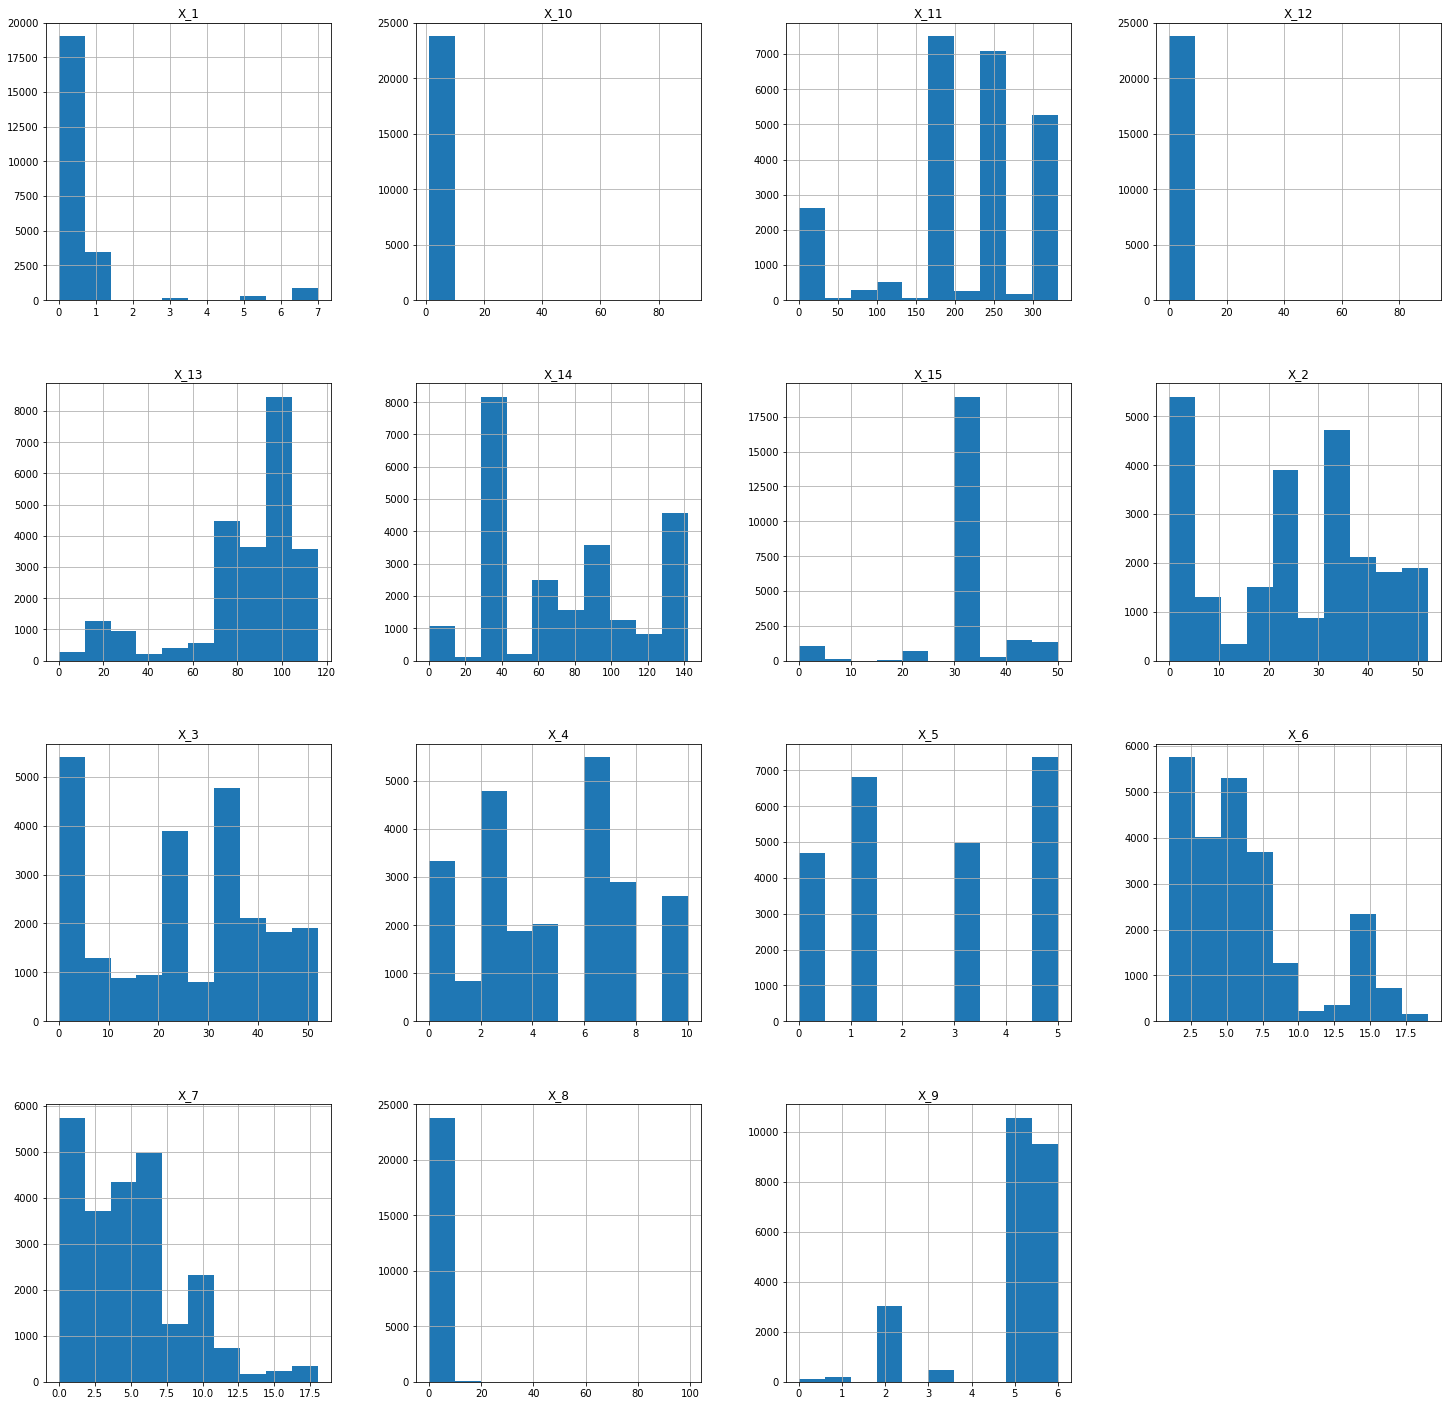

In [24]:
# Viewing the distribution of all the variables in server_x using histogram
server_x.hist(figsize=(25,25))

In [25]:
'''We will now scale the values of the variables in server_x using StandarScaler from sklearn.preprocessing i.e. calculate z-scores'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_prep = scaler.fit_transform(server_x)

In [26]:
test_prep = server_test
test_prep = scaler.fit_transform(test_prep)

### Logistic Regression

As we know, that the given problem is a classification problem where the two classes are 1 : Incident is a hack and 0: Incident is not a hack. So, in order to predict the result for column : MULTIPLE_OFFENSE, we need to apply a classification algorithm such as Logistic Regression, SVC, K-Nearest Neighbors, Random Forest Classifier, or any other.

In our case, __let us first build a classification model using Logistic Regression.__

We will then train a new model using all the values of train_prep and then use it to predict the outcomes of test_prep data which is required to complete the challenge.

In [27]:
#Importing Logistic Regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()

In [34]:
'''Now training using all the data of train_prep and predicting server_test'''

log_clf.fit(train_prep,server_y)                        # Fitting the Logistic Regression model on whole train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
predicted = log_clf.predict(test_prep)                   # Predicting the MULTIPLE_OFFENSE column

In [36]:
predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [37]:
import collections
collections.Counter(predicted)

Counter({1: 15686, 0: 217})

In [39]:
type(result)

pandas.core.frame.DataFrame

In [40]:
type(predicted)

numpy.ndarray

In [41]:
prediction = pd.DataFrame(predicted)                # Changing the predicted numpy array to a pandas dataframe

In [42]:
'''Preparing the submission dataset with values of INCIDENT_ID from provided test data and MULTIPLE_OFFENSE (predicted) values'''

output = pd.concat([result,prediction],axis=1)      # Joining the two dataframes into one required dataframe
output.columns = ['INCIDENT_ID','MULTIPLE_OFFENSE'] # Naming the columns of the dataframe
output.head() #viewing the output

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [166]:
'''Saving the predicted output file as a csv file'''

output.to_csv('desktop/DATA/Novartis_Challenge/prediction.csv',index=False)

### Support Vector Classifier

Now we will use SVC to make another classification model and see if it returns a better result

In [43]:
from sklearn.svm import SVC
svc_clf = SVC()

In [44]:
svc_clf.fit(train_prep,server_y)                     # Fitting the SVC model with default 'rbf' kernel on whole train data

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
predicted = svc_clf.predict(test_prep)               # Predicting the MULTIPLE_OFFENSE column

In [46]:
svc_pred = pd.DataFrame(predicted)                   # Changing to pandas dataframe
output1 = pd.concat([result,svc_pred],axis=1)        # Joining the two dataframes into one required dataframe
output1.columns = ['INCIDENT_ID','MULTIPLE_OFFENSE'] # Naming the columns of the dataframe
output1.head() #viewing the output

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [180]:
output1.to_csv('desktop/DATA/Novartis_Challenge/pred_svc.csv',index=False)

In [47]:
'''SVC with linear kernel'''
svc_clf1 = SVC(kernel = 'linear')

In [48]:
svc_clf1.fit(train_prep,server_y)                      # Fitting the SVC model with linear kernel on whole train data
predicted = svc_clf.predict(test_prep)                 # Predicting the MULTIPLE_OFFENSE column
svc_lin_pred = pd.DataFrame(predicted)                 # Changing to pandas dataframe
output2 = pd.concat([result,svc_lin_pred],axis=1)      # Joining the two dataframes into one required dataframe
output2.columns = ['INCIDENT_ID','MULTIPLE_OFFENSE']   # Naming the columns of the dataframe
output2.head() #viewing the output

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [183]:
output2.to_csv('desktop/DATA/Novartis_Challenge/pred_svclin.csv',index=False)

### KNN

Training the model using K Nearest Neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [50]:
knn_clf.fit(train_prep,server_y)                        # Fitting the KNeighborsClassifier model on whole train data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
predicted = knn_clf.predict(test_prep)                  # Predicting the MULTIPLE_OFFENSE column

In [52]:
knn_pred = pd.DataFrame(predicted)                      # Changing into pandas dataframe
output2 = pd.concat([result,knn_pred],axis=1)           # Joining the two dataframes into one required dataframe
output2.columns = ['INCIDENT_ID','MULTIPLE_OFFENSE']    # Naming the columns of the dataframe
output2.head() #viewing the output

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [203]:
output2.to_csv('desktop/DATA/Novartis_Challenge/pred_knn.csv',index=False)  # Saving the result into a csv file

### Random Forest Classifier

Now we will predict whether the server will be hacked or not using Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier()

In [54]:
rand_clf.fit(train_prep,server_y)                       # Fitting the Random Forest Classifier on whole train data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
predicted = rand_clf.predict(test_prep)                 # Predicting the MULTIPLE_OFFENSE column

In [56]:
rand_pred = pd.DataFrame(predicted)                     # Changing into pandas dataframe
output3 = pd.concat([result,rand_pred],axis=1)          # Joining the two dataframes into one required dataframe
output3.columns = ['INCIDENT_ID','MULTIPLE_OFFENSE']    # Naming the columns of the dataframe
output3.head()                                          #viewing the output

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [65]:
output3.to_csv('desktop/DATA/Novartis_Challenge/pred_rand.csv',index=False)   # Saving the result into a csv file

### Grid Search CV on Random Forest Classifier

This will be used to tune the hyperparameters and find the best estimator and best parameters 

In [58]:
from sklearn.model_selection import GridSearchCV
# Setting the parameters to be tested
params = {'n_estimators':[500,1000,1500,2000,2500],'max_features':['auto','sqrt'],'criterion':['gini','entropy'],
          'bootstrap':[True,False]} 

In [59]:
gridsearch = GridSearchCV(rand_clf,params,cv=10,scoring='recall')    

In [60]:
gridsearch.fit(train_prep,server_y)              # Fitting the GridSearchCV to find the best model

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500, 1000, 1500, 2000, 2500], 'max_features': ['auto', 'sqrt'], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [62]:
gridsearch.best_params_ 

{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 2000}

In [64]:
tunedmodel = gridsearch.best_estimator_

In [65]:
tunedmodel.fit(train_prep,server_y)             # Fitting the whole train data using the tuned model returned by Grid Search

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
predicted = tunedmodel.predict(test_prep)       # Predicting the MULTIPLE_OFFENSE Column

In [67]:
tuned_pred = pd.DataFrame(predicted)                 # Changing into dataframe
output4 = pd.concat([result,tuned_pred],axis=1)      # Joining the two dataframes into one required dataframe
output4.columns = ['INCIDENT_ID','MULTIPLE_OFFENSE'] # Naming the columns of the dataframe
output4.head()                                       #viewing the output

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [69]:
output4.to_csv('desktop/DATA/Novartis_Challenge/pred_tuned.csv',index=False)  # Saving the result into a csv file